In [1]:
#1: folium 제작 -> \ 불법 주정차 신고수 (15- 22 변화량 15년 보여주고 22년 보여주고)
#포인트는 불법 주정차와 혼잡도의 상관관계
#2: 시계열 그래프 -> 자동차 등록 수, 주차장 확보율 이후 얼마나 지어야 현임의 모델 가중치 재 주차장 확보율을 유지할 수 있는지 인사이트 도출
#3: 어디다 지을지 모델 regression (딥러닝 / ML) 아니면 줘서
#4: 2, 3 엮어서 최적의 증설지역 찾고 공영 주차장 증설 시 최적 요금 계산+ #5 시뮬레이션 시간되면 하고 + 탄력요금제 or 제휴시설 주차장 insight
#6: action-plan -> #4 모델 지속적 사용으로 최적 위치 파악 후 주차장 증설 + 동선 설계 개선 + 주차장 위치 알려주기 + 병목위치 구조개선 소프트웨어적 방법으로 
# 개선 불가능한 지점 찾고 이후에는 도시공학전문간ㅇㅁㄻㄴㅁ

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import folium
folium.__version__

'0.14.0'

In [4]:
import numpy as np
import pandas as pd
import json
import requests
import branca

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# folium

In [6]:
illegal = pd.read_csv('/content/drive/MyDrive/강서구 데이터/illegalparking.csv', encoding='cp949')
illegal.columns = ['years','gu','dong','name','counts']
illegal

,years,gu,dong,name,counts
0,2015,강서구,가양1동,주정차위반과태료,2282
1,2015,강서구,가양2동,주정차위반과태료,864
2,2015,강서구,가양3동,주정차위반과태료,2682
3,2015,강서구,공항동,주정차위반과태료,7447
4,2015,강서구,등촌1동,주정차위반과태료,3523
...,...,...,...,...,...
115,2020,강서구,화곡3동,주정차위반과태료,4245
116,2020,강서구,화곡4동,주정차위반과태료,5120
117,2020,강서구,화곡6동,주정차위반과태료,5820
118,2020,강서구,화곡8동,주정차위반과태료,3628


In [7]:
illegal[illegal['dong']=='발산1동']

,years,gu,dong,name,counts
7,2015,강서구,발산1동,주정차위반과태료,3512
27,2016,강서구,발산1동,주정차위반과태료,6879
47,2017,강서구,발산1동,주정차위반과태료,8451
67,2018,강서구,발산1동,주정차위반과태료,10245
87,2019,강서구,발산1동,주정차위반과태료,14247
107,2020,강서구,발산1동,주정차위반과태료,20476


In [8]:
illegal['sangsae'] = illegal['gu'] + ' ' + illegal['dong']

In [9]:
illegal

,years,gu,dong,name,counts,sangsae
0,2015,강서구,가양1동,주정차위반과태료,2282,강서구 가양1동
1,2015,강서구,가양2동,주정차위반과태료,864,강서구 가양2동
2,2015,강서구,가양3동,주정차위반과태료,2682,강서구 가양3동
3,2015,강서구,공항동,주정차위반과태료,7447,강서구 공항동
4,2015,강서구,등촌1동,주정차위반과태료,3523,강서구 등촌1동
...,...,...,...,...,...,...
115,2020,강서구,화곡3동,주정차위반과태료,4245,강서구 화곡3동
116,2020,강서구,화곡4동,주정차위반과태료,5120,강서구 화곡4동
117,2020,강서구,화곡6동,주정차위반과태료,5820,강서구 화곡6동
118,2020,강서구,화곡8동,주정차위반과태료,3628,강서구 화곡8동


In [10]:
from geopy.geocoders import Nominatim
geo_local = Nominatim(user_agent='South Korea')

In [11]:
def geocoding(address):
    try:
        geo = geo_local.geocode(address)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

In [12]:
latitude = []
longitude =[]

for i in illegal.dong:
    latitude.append(geocoding(i)[0])
    longitude.append(geocoding(i)[1])

#####Dataframe만들기######
address_df = pd.DataFrame({'years': illegal['years'],'sangsae': illegal['sangsae'],'counts': illegal['counts'],'lat':latitude,'long':longitude})

#df저장
address_df.to_csv('illegalcount.csv')

In [13]:
address_df.loc[0,'lat'] = 37.569417
address_df.loc[0,'long'] = 126.844717
address_df.loc[1,'lat'] = 37.569417
address_df.loc[1,'long'] = 126.844717


In [14]:
address_df

,years,sangsae,counts,lat,long
0,2015,강서구 가양1동,2282,37.569417,126.844717
1,2015,강서구 가양2동,864,37.569417,126.844717
2,2015,강서구 가양3동,2682,37.561656,126.860025
3,2015,강서구 공항동,7447,37.555680,126.793126
4,2015,강서구 등촌1동,3523,37.555942,126.858425
...,...,...,...,...,...
115,2020,강서구 화곡3동,4245,37.543912,126.833978
116,2020,강서구 화곡4동,5120,37.535967,126.858453
117,2020,강서구 화곡6동,5820,37.551499,126.851543
118,2020,강서구 화곡8동,3628,37.533210,126.848480


In [15]:
address2015 = address_df[address_df['years']==2015]
address2015['rcounts'] = address2015['counts'].mul(0.1)
address2015.drop(['counts'],axis=1, inplace = True)
address2015

<ipython-input-15-555616a53924>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  address2015['rcounts'] = address2015['counts'].mul(0.1)
<ipython-input-15-555616a53924>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  address2015.drop(['counts'],axis=1, inplace = True)


,years,sangsae,lat,long,rcounts
0,2015,강서구 가양1동,37.569417,126.844717,228.2
1,2015,강서구 가양2동,37.569417,126.844717,86.4
2,2015,강서구 가양3동,37.561656,126.860025,268.2
3,2015,강서구 공항동,37.555680,126.793126,744.7
4,2015,강서구 등촌1동,37.555942,126.858425,352.3
5,2015,강서구 등촌2동,37.544750,126.858542,416.8
6,2015,강서구 등촌3동,37.562624,126.845606,587.8
7,2015,강서구 발산1동,37.549960,126.825017,351.2
8,2015,강서구 방화1동,37.568676,126.817724,605.0
9,2015,강서구 방화2동,37.582953,126.801234,556.7


In [16]:
address2015['rcountsf'] = address2015['rcounts'].astype(int)
address2015.drop(['rcounts'],axis=1, inplace = True)
address2015

<ipython-input-16-a1a14708e741>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  address2015['rcountsf'] = address2015['rcounts'].astype(int)
<ipython-input-16-a1a14708e741>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  address2015.drop(['rcounts'],axis=1, inplace = True)


,years,sangsae,lat,long,rcountsf
0,2015,강서구 가양1동,37.569417,126.844717,228
1,2015,강서구 가양2동,37.569417,126.844717,86
2,2015,강서구 가양3동,37.561656,126.860025,268
3,2015,강서구 공항동,37.555680,126.793126,744
4,2015,강서구 등촌1동,37.555942,126.858425,352
5,2015,강서구 등촌2동,37.544750,126.858542,416
6,2015,강서구 등촌3동,37.562624,126.845606,587
7,2015,강서구 발산1동,37.549960,126.825017,351
8,2015,강서구 방화1동,37.568676,126.817724,605
9,2015,강서구 방화2동,37.582953,126.801234,556


In [17]:
sum(address2015.rcountsf)

8778

In [18]:
new_df = pd.DataFrame(columns=['idx'])

In [19]:
for i in range(sum(address2015.rcountsf)):
  new_df = new_df.append(pd.DataFrame([[i]], columns=['idx']), ignore_index
=True)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
<ipython-input-19-fcb2a60cbbaf>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(pd.DataFrame([[i]], columns=['idx']), ignore_index
<ipython-input-19-fcb2a60cbbaf>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(pd.DataFrame([[i]], columns=['idx']), ignore_index
<ipython-input-19-fcb2a60cbbaf>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(pd.DataFrame([[i]], columns=['idx']), ignore_index
<ipython-input-19-fcb2a60cbbaf>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(pd.DataFrame([[i]], columns=['idx']), i

In [20]:
c = list(address2015.sangsae.unique())

In [21]:
k=0
for i in c :
  j = int(address2015[address2015['sangsae']==i].rcountsf)
  k += j
  new_df.loc[k-j:k, ['lat', 'long']] =  (float(address2015[address2015['sangsae']==i].lat), float(address2015[address2015['sangsae']==i].long))



In [22]:
new_df.lat.unique()

array([37.569417  , 37.5616562 , 37.5556799 , 37.5559421 , 37.5447496 ,
       37.56262355, 37.5499599 , 37.56867575, 37.58295305, 37.58353285,
       37.5573562 , 37.5502949 , 37.53468065, 37.53449755, 37.543912  ,
       37.53596695, 37.55149935, 37.53321015, 37.5430162 ])

In [23]:
from folium.plugins import MarkerCluster

# 강서구청 위도경도 설정해주고 
m = folium.Map(
    location=[37.550332499999996,126.84896699999999],
    attr = 'VWorldBase',
    zoom_start = 15
)

In [24]:
coords = new_df[['lat','long']]
marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(coords['lat'], coords['long']):
    folium.Marker([lat, long], icon = folium.Icon(color="green")).add_to(marker_cluster)

In [25]:
m

Output hidden; open in https://colab.research.google.com to view.

In [26]:
parking = pd.read_csv('/content/drive/MyDrive/강서구 데이터/서울특별시_강서구_거주자우선주차정보_20221227 (1).csv', encoding='cp949')



In [27]:
parking.columns

Index(['거주자우선주차구획번호', '거주자우선주차구획위도', '거주자우선주차구획경도', '거주자우선주차구역명', '소재지도로명주소',
       '소재지지번주소', '운영형태', '사용시간대정보', '사용기간', '이용요금', '이용요금할인정보', '이용요금결제방법',
       '이용요금환불안내정보', '정기접수시작일자', '정기접수종료일자', '신청방법', '신청서류', '관리기관전화번호',
       '관리기관명', '데이터기준일자'],
      dtype='object')

In [28]:
parking = parking[['거주자우선주차구획위도','거주자우선주차구획경도','거주자우선주차구획번호']]

In [29]:
parking.columns = ['lat', 'long', 'idx',]

In [30]:
# 강서구청 위도경도 설정해주고 
m2 = folium.Map(
    location=[37.550332499999996,126.84896699999999],
    attr = 'VWorldBase',
    zoom_start = 15
)

In [31]:
park2 = parking[['lat','long']]
marker_cluster = MarkerCluster().add_to(m2)

for lat, long in zip(park2['lat'], park2['long']):
    folium.Marker([lat, long], icon = folium.Icon(color="green")).add_to(marker_cluster)

In [32]:
m2

Output hidden; open in https://colab.research.google.com to view.

In [33]:
address2020 = address_df[address_df['years']==2020]
address2020['rcounts'] = address2020['counts'].mul(0.1)
address2020.drop(['counts'],axis=1, inplace = True)
address2020['rcountsf'] = address2020['rcounts'].astype(int)
address2020.drop(['rcounts'],axis=1, inplace = True)


<ipython-input-33-cdb8d2b9a924>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  address2020['rcounts'] = address2020['counts'].mul(0.1)
<ipython-input-33-cdb8d2b9a924>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  address2020.drop(['counts'],axis=1, inplace = True)
<ipython-input-33-cdb8d2b9a924>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

In [34]:
address2020['long'] = round(address2020['long'], 6)

<ipython-input-34-59fd508c37cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  address2020['long'] = round(address2020['long'], 6)


In [35]:
address2020["lat"] = address2020["lat"].replace(36.3433022, 37.569417)
address2020["lat"] = address2020["lat"].replace(36.3478664, 37.5616562)
address2020["long"] = address2020["long"].replace(127.443230,126.844717)
address2020["long"] = address2020["long"].replace(127.454264,126.860025)

<ipython-input-35-d46a9cd624fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  address2020["lat"] = address2020["lat"].replace(36.3433022, 37.569417)
<ipython-input-35-d46a9cd624fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  address2020["lat"] = address2020["lat"].replace(36.3478664, 37.5616562)
<ipython-input-35-d46a9cd624fd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [36]:
new_df1 = pd.DataFrame(columns=['idx'])

In [37]:
for i in range(sum(address2020.rcountsf)):
  new_df1 = new_df1.append(pd.DataFrame([[i]], columns=['idx']), ignore_index
=True)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
<ipython-input-37-8bc033cc81aa>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df1 = new_df1.append(pd.DataFrame([[i]], columns=['idx']), ignore_index
<ipython-input-37-8bc033cc81aa>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df1 = new_df1.append(pd.DataFrame([[i]], columns=['idx']), ignore_index
<ipython-input-37-8bc033cc81aa>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df1 = new_df1.append(pd.DataFrame([[i]], columns=['idx']), ignore_index
<ipython-input-37-8bc033cc81aa>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df1 = new_df1.append(pd.DataFrame([[i]], columns=['i

In [38]:
cc = list(address2020.sangsae.unique())

In [39]:
k=0
for i in cc :
  j = int(address2020[address2020['sangsae']==i].rcountsf)
  k += j
  new_df1.loc[k-j:k, ['lat', 'long']] =  (float(address2020[address2020['sangsae']==i].lat), float(address2020[address2020['sangsae']==i].long))

In [40]:

# 강서구청 위도경도 설정해주고 
m = folium.Map(
    location=[37.550332499999996,126.84896699999999],
    attr = 'VWorldBase',
    zoom_start = 15
)

In [41]:
coords = new_df1[['lat','long']]
marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(coords['lat'], coords['long']):
    folium.Marker([lat, long], icon = folium.Icon(color="green")).add_to(marker_cluster)

In [42]:
new_df1['lat'].unique()

array([37.569417  , 37.5616562 , 37.5556799 , 37.5559421 , 37.5447496 ,
       37.56262355, 37.5499599 , 37.56867575, 37.58295305, 37.58353285,
       37.5573562 , 37.5502949 , 37.53468065, 37.53449755, 37.543912  ,
       37.53596695, 37.55149935, 37.53321015, 37.5430162 ])

In [43]:
new_df1[['lat','long']]

,lat,long
0,37.569417,126.844717
1,37.569417,126.844717
2,37.569417,126.844717
3,37.569417,126.844717
4,37.569417,126.844717
...,...,...
17255,37.543016,126.848895
17256,37.543016,126.848895
17257,37.543016,126.848895
17258,37.543016,126.848895


In [44]:
m

Output hidden; open in https://colab.research.google.com to view.

# 시계열 그려보기

In [45]:
cars = pd.read_excel('/content/drive/MyDrive/강서구 데이터/cars.xlsx')
cars = cars[cars['○ 자동차등록(월별/구별) [대]']=='강서구']
cars = cars.fillna(0)
cars.drop(['Unnamed: 4'], axis=1, inplace = True)
cars.columns = ['구','종류','용도','단위(대)','2011.01','2011.02','2011.03','2011.04','2011.05','2011.06','2011.07','2011.08','2011.09','2011.10','2011.11','2011.12','2012.01','2012.02','2012.03','2012.04','2012.05','2012.06','2012.07','2012.08','2012.09','2012.10','2012.11','2012.12','2013.01','2013.02','2013.03','2013.04','2013.05','2013.06','2013.07','2013.08','2013.09','2013.10','2013.11','2013.12','2014.01','2014.02','2014.03','2014.04','2014.05','2014.06','2014.07','2014.08','2014.09','2014.10','2014.11','2014.12','2015.01','2015.02','2015.03','2015.04','2015.05','2015.06','2015.07','2015.08','2015.09','2015.10','2015.11','2015.12','2016.01','2016.02','2016.03','2016.04','2016.05','2016.06','2016.07','2016.08','2016.09','2016.10','2016.11','2016.12','2017.01','2017.02','2017.03','2017.04','2017.05','2017.06','2017.07','2017.08','2017.09','2017.10','2017.11','2017.12','2018.01','2018.02','2018.03','2018.04','2018.05','2018.06','2018.07','2018.08','2018.09','2018.10','2018.11','2018.12','2019.01','2019.02','2019.03','2019.04','2019.05','2019.06','2019.07','2019.08','2019.09','2019.10','2019.11','2019.12','2020.01','2020.02','2020.03','2020.04','2020.05','2020.06','2020.07','2020.08','2020.09','2020.10','2020.11','2020.12','2021.01','2021.02','2021.03','2021.04','2021.05','2021.06','2021.07','2021.08','2021.09','2021.10','2021.11','2021.12','2022.01','2022.02','2022.03','2022.04','2022.05','2022.06','2022.07','2022.08','2022.09','2022.10','2022.11','2022.12']
cars

,구,종류,용도,단위(대),2011.01,2011.02,2011.03,2011.04,2011.05,2011.06,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
385,강서구,합계,계,자동차등록 (월별/구별),181288,181509,181745,181785,181662,181898,...,206352,206522,206847,207008,207287,207032,207061,206968,207411,207536
386,강서구,합계,관용,자동차등록 (월별/구별),349,351,354,287,283,284,...,344,344,349,348,350,352,352,360,361,356
387,강서구,합계,자가용,자동차등록 (월별/구별),161402,161223,161569,161706,161466,161540,...,187870,188547,188879,189405,189648,189440,189548,189409,189904,190069
388,강서구,합계,영업용,자동차등록 (월별/구별),19537,19935,19822,19792,19913,20074,...,18138,17631,17619,17255,17289,17240,17161,17199,17146,17111
389,강서구,승용차,계,자동차등록 (월별/구별),148277,148679,148994,149224,149235,149491,...,178262,178428,178686,178772,178998,178751,178783,178730,179246,179418
390,강서구,승용차,관용,자동차등록 (월별/구별),111,114,114,70,71,75,...,127,127,128,128,129,129,129,131,131,128
391,강서구,승용차,자가용,자동차등록 (월별/구별),132643,132650,133123,133437,133312,133419,...,165787,166507,166816,167289,167483,167244,167354,167251,167831,168042
392,강서구,승용차,영업용,자동차등록 (월별/구별),15523,15915,15757,15717,15852,15997,...,12348,11794,11742,11355,11386,11378,11300,11348,11284,11248
393,강서구,승합차,계,자동차등록 (월별/구별),11073,11021,11026,10901,10810,10812,...,6317,6266,6257,6255,6211,6166,6138,6093,6069,6021
394,강서구,승합차,관용,자동차등록 (월별/구별),58,58,58,37,36,36,...,45,45,47,46,47,50,50,50,51,48


In [46]:
cars_합계 = cars[cars['종류']=='합계']
carsu = cars_합계.transpose()
carsu.drop(['구','종류','단위(대)'],axis=0,inplace=True)
carsu.columns = ['total','관용','자가용','영업용']
carsu.drop(['용도'],axis=0,inplace=True)
carsu

,total,관용,자가용,영업용
2011.01,181288,349,161402,19537
2011.02,181509,351,161223,19935
2011.03,181745,354,161569,19822
2011.04,181785,287,161706,19792
2011.05,181662,283,161466,19913
...,...,...,...,...
2022.08,207032,352,189440,17240
2022.09,207061,352,189548,17161
2022.10,206968,360,189409,17199
2022.11,207411,361,189904,17146


<Axes: >

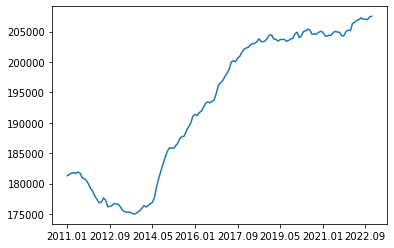

In [47]:
carsu['total'].plot()

In [48]:
n_breaks=4

In [49]:
import numpy as np
ts = carsu['total']
y = np.array(ts.tolist())

In [50]:
!pip install jenkspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.0/524.0 KB 9.2 MB/s eta 0:00:00


In [51]:
import jenkspy
breaks = jenkspy.jenks_breaks(y, 3)

In [52]:
breaks_jkp = []
for v in breaks:
    breaks_jkp.append(ts.index[ts == v])
breaks_jkp

[Index(['2013.09'], dtype='object'),
 Index(['2014.11'], dtype='object'),
 Index(['2017.02'], dtype='object'),
 Index(['2022.12'], dtype='object')]

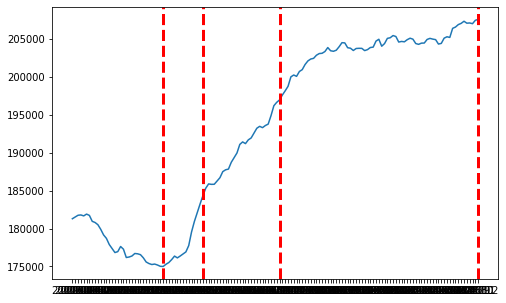

In [53]:
plt.figure(figsize=(8,5))

plt.plot(carsu['total'])
plt.axvline(x='2013.09', color='r', linestyle='--', linewidth=3)
plt.axvline(x='2014.11', color='r', linestyle='--', linewidth=3)
plt.axvline(x='2017.02', color='r', linestyle='--', linewidth=3)
plt.axvline(x='2022.12', color='r', linestyle='--', linewidth=3)

plt.show()

In [54]:
#2013.09 기름값 2000원 돌파! 2006.7원
#2014.11 주민등록 인구가 16000명 가량 늘어남. 최대 변화폭 2013년 이후 꾸진히 기름값 하락
#2017.02 꾸진히 하락하는 기름값. 늘어나는 근로소득
#2022 근로소득 급격하게 늘어남

In [55]:
#자동차수에 영향을 끼치는 변수: 인구, 소득, 유지비용(기름값?)
#이 변수들을 가지고 VAR을 돌려보자 -> 2023년 자동차수를 예측해보고 얼마나 주차장을 증설해야 하는지 고민해보자

In [56]:
years = ['2011 1/4', '2011 2/4','2011 3/4','2011 4/4','2012 1/4','2012 2/4','2012 3/4','2012 4/4','2013 1/4','2013 2/4','2013 3/4','2013 4/4','2014 1/4','2014 2/4','2014 3/4','2014 4/4','2015 1/4','2015 2/4','2015 3/4','2015 4/4','2016 1/4','2016 2/4','2016 3/4','2016 4/4','2017 1/4','2017 2/4','2017 3/4', '2017 4/4','2018 1/4','2018 2/4','2018 3/4','2018 4/4','2019 1/4','2019 2/4','2019 3/4','2019 4/4','2020 1/4','2020 2/4','2020 3/4','2020 4/4','2021 1/4','2021 2/4','2021 3/4','2021 4/4','2022 1/4','2022 2/4','2022 3/4','2022 4/4']

In [57]:
popu = pd.read_excel('/content/drive/MyDrive/강서구 데이터/population.xlsx')
popu.drop(['동별(1)'],axis=1,inplace=True)
popu.drop([0],axis=0,inplace=True)
popu = popu.transpose()
popu.drop(['동별(2)'],axis=0,inplace=True)
popu.drop([1],axis=1,inplace=True)
popu

/usr/local/lib/python3.9/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,2
2011 1/4,285926
2011 1/4.1,293743
2011 2/4,285672
2011 2/4.1,293616
2011 3/4,284483
...,...
2022 2/4.1,300870
2022 3/4,276208
2022 3/4.1,299605
2022 4/4,275585


In [58]:
a = popu.iloc[0:2].sum()
b = popu.iloc[2:4].sum()
c = popu.iloc[4:6].sum()
d = popu.iloc[6:8].sum()
e = popu.iloc[8:10].sum()
f = popu.iloc[10:12].sum()
g = popu.iloc[12:14].sum()
h = popu.iloc[14:16].sum()
i = popu.iloc[16:18].sum()
j = popu.iloc[18:20].sum()
k = popu.iloc[20:22].sum()
l = popu.iloc[22:24].sum()
m = popu.iloc[24:26].sum()
n = popu.iloc[26:28].sum()
o = popu.iloc[28:30].sum()
p = popu.iloc[30:32].sum()
q = popu.iloc[32:34].sum()
r = popu.iloc[34:36].sum()
s = popu.iloc[36:38].sum()
t = popu.iloc[38:40].sum()
u = popu.iloc[40:42].sum()
v = popu.iloc[42:44].sum()
w = popu.iloc[44:46].sum()
z = popu.iloc[46:48].sum()
aa = popu.iloc[48:50].sum()
bb = popu.iloc[50:52].sum()
cc = popu.iloc[52:54].sum()
dd = popu.iloc[54:56].sum()
ee = popu.iloc[56:58].sum()
ff = popu.iloc[58:60].sum()
gg = popu.iloc[60:62].sum()
hh = popu.iloc[62:64].sum()
ii = popu.iloc[64:66].sum()
jj = popu.iloc[66:68].sum()
kk = popu.iloc[68:70].sum()
ll = popu.iloc[70:72].sum()
mm = popu.iloc[72:74].sum()
nn = popu.iloc[74:76].sum()
oo = popu.iloc[76:78].sum()
pp = popu.iloc[78:80].sum()
qq = popu.iloc[80:82].sum()
rr = popu.iloc[82:84].sum()
ss = popu.iloc[84:86].sum()
tt = popu.iloc[86:88].sum()
uu = popu.iloc[88:90].sum()
vv = popu.iloc[90:92].sum()
ww = popu.iloc[92:94].sum()
zz = popu.iloc[94:96].sum()
aaa= pd.DataFrame(a)
bbb= pd.DataFrame(b)
ccc= pd.DataFrame(c)
ddd= pd.DataFrame(d)
eee= pd.DataFrame(e)
fff= pd.DataFrame(f)
ggg= pd.DataFrame(g)
hhh= pd.DataFrame(h)
iii= pd.DataFrame(i)
jjj= pd.DataFrame(j)
kkk= pd.DataFrame(k)
lll= pd.DataFrame(l)
mmm= pd.DataFrame(m)
nnn= pd.DataFrame(n)
ooo= pd.DataFrame(o)
ppp= pd.DataFrame(p)
qqq= pd.DataFrame(q)
rrr= pd.DataFrame(r)
sss= pd.DataFrame(s)
ttt= pd.DataFrame(t)
uuu= pd.DataFrame(u)
vvv= pd.DataFrame(v)
www= pd.DataFrame(w)
zzz= pd.DataFrame(z)
aaaa= pd.DataFrame(aa)
bbbb= pd.DataFrame(bb)
cccc= pd.DataFrame(cc)
dddd= pd.DataFrame(dd)
eeee= pd.DataFrame(ee)
ffff= pd.DataFrame(ff)
gggg= pd.DataFrame(gg)
hhhh= pd.DataFrame(hh)
iiii= pd.DataFrame(ii)
jjjj= pd.DataFrame(jj)
kkkk= pd.DataFrame(kk)
llll= pd.DataFrame(ll)
mmmm= pd.DataFrame(mm)
nnnn= pd.DataFrame(nn)
oooo= pd.DataFrame(oo)
pppp= pd.DataFrame(pp)
qqqq= pd.DataFrame(qq)
rrrr= pd.DataFrame(rr)
ssss= pd.DataFrame(ss)
tttt= pd.DataFrame(tt)
uuuu= pd.DataFrame(uu)
vvvv= pd.DataFrame(vv)
wwww= pd.DataFrame(ww)
zzzz= pd.DataFrame(zz)
popuu = [aaa, bbb, ccc, ddd, eee, fff, ggg, hhh, iii, jjj, kkk, lll, mmm,nnn,ooo,ppp,qqq,rrr,sss,ttt,uuu,vvv,www,zzz,aaaa,bbbb,cccc,dddd,eeee,ffff,gggg,hhhh,iiii,jjjj,kkkk,llll,mmmm,nnnn,oooo,pppp,qqqq,rrrr,ssss,tttt,uuuu,vvvv,wwww,zzzz]

popuu = pd.concat(popuu, ignore_index=True)
popuu.index = years

popuu.iloc[10, 0] = 574901
popuu.iloc[11, 0] = 575236
popuu.iloc[12, 0] = 579340
popuu.iloc[13, 0] = 583445
popuu.iloc[14, 0] = 587549
popuu.iloc[15, 0] = 591653
popuu.iloc[16, 0] = 593209
popuu.iloc[17, 0] = 594764
popuu.columns = ['population']

popuu = popuu.iloc[4:48]
popuu = popuu[['population']].astype(int)
popuu

,population
2012 1/4,575205
2012 2/4,574994
2012 3/4,574777
2012 4/4,573794
2013 1/4,573808
2013 2/4,574355
2013 3/4,574901
2013 4/4,575236
2014 1/4,579340
2014 2/4,583445


<Axes: >

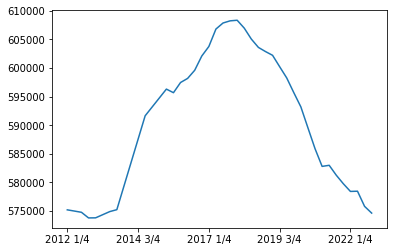

In [59]:
popuu['population'].plot()

In [60]:
years1 = ['2012 1/4','2012 2/4','2012 3/4','2012 4/4','2013 1/4','2013 2/4','2013 3/4','2013 4/4','2014 1/4','2014 2/4','2014 3/4','2014 4/4','2015 1/4','2015 2/4','2015 3/4','2015 4/4','2016 1/4','2016 2/4','2016 3/4','2016 4/4','2017 1/4','2017 2/4','2017 3/4', '2017 4/4','2018 1/4','2018 2/4','2018 3/4','2018 4/4','2019 1/4','2019 2/4','2019 3/4','2019 4/4','2020 1/4','2020 2/4','2020 3/4','2020 4/4','2021 1/4','2021 2/4','2021 3/4','2021 4/4','2022 1/4','2022 2/4','2022 3/4','2022 4/4']

In [61]:
income = pd.read_excel('/content/drive/MyDrive/강서구 데이터/income.xlsx')
income

/usr/local/lib/python3.9/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,구분별(1),2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,구분별(1),경상소득(전년도),경상소득(전년도),경상소득(전년도),경상소득(전년도),경상소득(전년도),경상소득(전년도),경상소득(전년도),경상소득(전년도),경상소득(전년도),경상소득(전년도),경상소득(전년도)
1,구분별(1),근로소득,근로소득,근로소득,근로소득,근로소득,근로소득,근로소득,근로소득,근로소득,근로소득,근로소득
2,서울,3159,3391,3507,3641,3650,4038.8,4375.6,4433.2,4323.7,4370.2,4851.7


In [62]:
income = pd.DataFrame({'income':[3159, 3159,3159,3159,3391,3391,3391,3391,3507,3507,3507,3507,3641,3641,3641,3641,3650,3650,3650,3650,4038.8,4038.8,4038.8,4038.8,4375.6,4375.6,4375.6,4375.6,4433.2,4433.2,4433.2,4433.2,4323.7,4323.7,4323.7,4323.7,4370.2,4370.2,4370.2,4370.2,4851.7,4851.7,4851.7,4851.7]})
income.index = years1
income

,income
2012 1/4,3159.0
2012 2/4,3159.0
2012 3/4,3159.0
2012 4/4,3159.0
2013 1/4,3391.0
2013 2/4,3391.0
2013 3/4,3391.0
2013 4/4,3391.0
2014 1/4,3507.0
2014 2/4,3507.0


<Axes: >

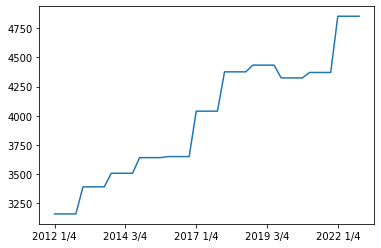

In [63]:
income['income'].plot()

In [64]:
oilprice = pd.read_csv('/content/drive/MyDrive/강서구 데이터/oilprice.csv',encoding='cp949')
oilprice.columns = ['years','oilprice']
oilprice.set_index('years',inplace=True)
oilprice.index = years1
oilprice

,oilprice
2012 1/4,2063.06
2012 2/4,2089.18
2012 3/4,2044.77
2012 4/4,2038.66
2013 1/4,2040.04
2013 2/4,1994.47
2013 3/4,2017.00
2013 4/4,1959.83
2014 1/4,1965.86
2014 2/4,1956.73


<Axes: >

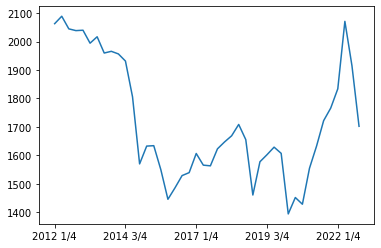

In [65]:
oilprice['oilprice'].plot()

In [66]:
carsu1 = carsu[['total']]
carsu1

,total
2011.01,181288
2011.02,181509
2011.03,181745
2011.04,181785
2011.05,181662
...,...
2022.08,207032
2022.09,207061
2022.10,206968
2022.11,207411


In [67]:
a = carsu1.iloc[0:3].mean()
b = carsu1.iloc[3:6].mean()
c = carsu1.iloc[6:9].mean()
d = carsu1.iloc[9:12].mean()
e = carsu1.iloc[12:15].mean()
f = carsu1.iloc[15:18].mean()
g = carsu1.iloc[18:21].mean()
h = carsu1.iloc[21:24].mean()
i = carsu1.iloc[24:27].mean()
j = carsu1.iloc[27:30].mean()
k = carsu1.iloc[30:33].mean()
l = carsu1.iloc[33:36].mean()
m = carsu1.iloc[36:39].mean()
n = carsu1.iloc[39:42].mean()
o = carsu1.iloc[42:45].mean()
p = carsu1.iloc[45:48].mean()
q = carsu1.iloc[48:51].mean()
r = carsu1.iloc[51:54].mean()
s = carsu1.iloc[54:57].mean()
t = carsu1.iloc[57:60].mean()
u = carsu1.iloc[60:63].mean()
v = carsu1.iloc[63:66].mean()
w = carsu1.iloc[66:69].mean()
x = carsu1.iloc[69:72].mean()
y = carsu1.iloc[72:75].mean()
z = carsu1.iloc[75:78].mean()
aa = carsu1.iloc[78:81].mean()
bb = carsu1.iloc[81:84].mean()
cc = carsu1.iloc[84:87].mean()
dd = carsu1.iloc[87:90].mean()
ee = carsu1.iloc[90:93].mean()
ff = carsu1.iloc[93:96].mean()
gg = carsu1.iloc[96:99].mean()
hh = carsu1.iloc[99:102].mean()
ii = carsu1.iloc[102:105].mean()
jj = carsu1.iloc[105:108].mean()
kk = carsu1.iloc[108:111].mean()
ll = carsu1.iloc[111:114].mean()
mm = carsu1.iloc[114:117].mean()
nn = carsu1.iloc[117:120].mean()
oo = carsu1.iloc[120:123].mean()
pp = carsu1.iloc[123:126].mean()
qq = carsu1.iloc[126:129].mean()
rr = carsu1.iloc[129:132].mean()
ss = carsu1.iloc[132:135].mean()
tt = carsu1.iloc[135:138].mean()
uu = carsu1.iloc[138:141].mean()
vv = carsu1.iloc[141:144].mean()

aaa= pd.DataFrame(a)
bbb= pd.DataFrame(b)
ccc= pd.DataFrame(c)
ddd= pd.DataFrame(d)
eee= pd.DataFrame(e)
fff= pd.DataFrame(f)
ggg= pd.DataFrame(g)
hhh= pd.DataFrame(h)
iii= pd.DataFrame(i)
jjj= pd.DataFrame(j)
kkk= pd.DataFrame(k)
lll= pd.DataFrame(l)
mmm= pd.DataFrame(m)
nnn= pd.DataFrame(n)
ooo= pd.DataFrame(o)
ppp= pd.DataFrame(p)
qqq= pd.DataFrame(q)
rrr= pd.DataFrame(r)
sss= pd.DataFrame(s)
ttt= pd.DataFrame(t)
uuu= pd.DataFrame(u)
vvv= pd.DataFrame(v)
www= pd.DataFrame(w)
xxx= pd.DataFrame(x)
yyy= pd.DataFrame(y)
zzz= pd.DataFrame(z)
aaaa= pd.DataFrame(aa)
bbbb= pd.DataFrame(bb)
cccc= pd.DataFrame(cc)
dddd= pd.DataFrame(dd)
eeee= pd.DataFrame(ee)
ffff= pd.DataFrame(ff)
gggg= pd.DataFrame(gg)
hhhh= pd.DataFrame(hh)
iiii= pd.DataFrame(ii)
jjjj= pd.DataFrame(jj)
kkkk= pd.DataFrame(kk)
llll= pd.DataFrame(ll)
mmmm= pd.DataFrame(mm)
nnnn= pd.DataFrame(nn)
oooo= pd.DataFrame(oo)
pppp= pd.DataFrame(pp)
qqqq= pd.DataFrame(qq)
rrrr= pd.DataFrame(rr)
ssss= pd.DataFrame(ss)
tttt= pd.DataFrame(tt)
uuuu= pd.DataFrame(uu)
vvvv= pd.DataFrame(vv)


carsuu = [aaa,bbb,ccc,ddd,eee,fff,ggg,hhh,iii,jjj,kkk,lll,mmm,nnn,ooo,ppp,qqq,rrr,sss,ttt,uuu,vvv,www,xxx,yyy,zzz,aaaa,bbbb,cccc,dddd,eeee,ffff,gggg,hhhh,iiii,jjjj,kkkk,llll,mmmm,nnnn,oooo,pppp,qqqq,rrrr,ssss,tttt,uuuu,vvvv]

carsuu = pd.concat(carsuu, ignore_index=True)
carsuu.index = years
carsuu.columns = ['carsamount']
carsuu = carsuu.iloc[4:48]
carsuu

,carsamount
2012 1/4,177985.000000
2012 2/4,177140.666667
2012 3/4,176569.000000
2012 4/4,176588.000000
2013 1/4,176097.666667
2013 2/4,175321.666667
2013 3/4,175074.000000
2013 4/4,175577.333333
2014 1/4,176294.333333
2014 2/4,177105.666667


<Axes: >

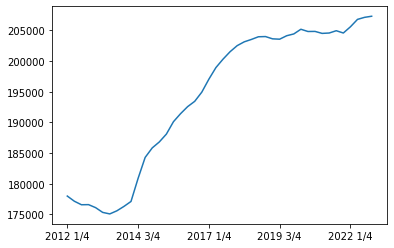

In [68]:
carsuu['carsamount'].plot()

In [69]:
interest = pd.DataFrame({
    
    
    'interest' : [3.25,3.25,3.00,2.75,2.75,2.50,2.50,2.50,2.50,2.50,2.25,2.00,1.75,1.50,1.50,1.50,1.50,1.25,1.25,1.25,1.25,1.25,1.25,1.50,1.50,1.50,1.50,1.75,1.75,1.75,1.50,1.25,0.75,0.50,0.50,0.50,0.50,0.50,0.75,1.00,1.25,1.75,2.50,3.25]
})

interest.index = years1
interest

,interest
2012 1/4,3.25
2012 2/4,3.25
2012 3/4,3.00
2012 4/4,2.75
2013 1/4,2.75
2013 2/4,2.50
2013 3/4,2.50
2013 4/4,2.50
2014 1/4,2.50
2014 2/4,2.50


<Axes: >

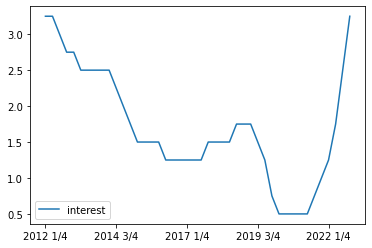

In [70]:
interest.plot()

In [71]:
GDP = pd.DataFrame({
    
    
    'GDP' : [344574.6,358275.7,361834.3,375426.7,355384.7,373096.5,379887.2,392450.8,373559.7,388566.9,393425.4,407377.0,394273.0,411386.8,420790.8,431569.8,413495.1,434536.3,439479.8,453268.4,433086.1,454226.7,473427.5,474957.9,449231.1,472824.7,485725.4,490411.3,455479.2,480743.7,488769.6,499505.6,460085.6,475980.0,496340.3,508320.3,483472.6,514474.3,528869.3,544841.8,509565.8,540700.8,546304.5,551000]
})

GDP.index = years1
GDP

,GDP
2012 1/4,344574.6
2012 2/4,358275.7
2012 3/4,361834.3
2012 4/4,375426.7
2013 1/4,355384.7
2013 2/4,373096.5
2013 3/4,379887.2
2013 4/4,392450.8
2014 1/4,373559.7
2014 2/4,388566.9


<Axes: >

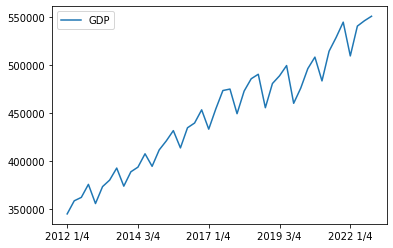

In [72]:
GDP.plot()

# 데이터프레임 병합

In [73]:
z = pd.concat([carsuu,oilprice],axis=1)
t = pd.concat([z,popuu],axis=1)
v = pd.concat([t,income],axis=1)
w = pd.concat([v,interest],axis=1)
q = pd.concat([w,GDP],axis =1)
q

,carsamount,oilprice,population,income,interest,GDP
2012 1/4,177985.000000,2063.06,575205,3159.0,3.25,344574.6
2012 2/4,177140.666667,2089.18,574994,3159.0,3.25,358275.7
2012 3/4,176569.000000,2044.77,574777,3159.0,3.00,361834.3
2012 4/4,176588.000000,2038.66,573794,3159.0,2.75,375426.7
2013 1/4,176097.666667,2040.04,573808,3391.0,2.75,355384.7
2013 2/4,175321.666667,1994.47,574355,3391.0,2.50,373096.5
2013 3/4,175074.000000,2017.00,574901,3391.0,2.50,379887.2
2013 4/4,175577.333333,1959.83,575236,3391.0,2.50,392450.8
2014 1/4,176294.333333,1965.86,579340,3507.0,2.50,373559.7
2014 2/4,177105.666667,1956.73,583445,3507.0,2.50,388566.9


In [74]:
q.corr()

,carsamount,oilprice,population,income,interest,GDP
carsamount,1.000000,-0.631434,0.452178,0.937788,-0.682486,0.934233
oilprice,-0.631434,1.000000,-0.728036,-0.415823,0.781115,-0.453736
population,0.452178,-0.728036,1.000000,0.253718,-0.515011,0.219867
income,0.937788,-0.415823,0.253718,1.000000,-0.511710,0.932988
interest,-0.682486,0.781115,-0.515011,-0.511710,1.000000,-0.579060
GDP,0.934233,-0.453736,0.219867,0.932988,-0.579060,1.000000


In [75]:
qq = q[['carsamount','population','oilprice','GDP','interest']]

# XGBOOST

In [76]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Load data
q
# Split data into train and test sets
train = q.iloc[0:40]
test = q.iloc[40:44]

# Prepare data for XGBoost
X_train, y_train = train.drop(columns=['carsamount']), train['carsamount']
X_test, y_test = test.drop(columns=['carsamount']), test['carsamount']

# Train XGBoost model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


RMSE: 9195.376502192996


In [77]:
y_pred

array([196073.27, 195088.45, 197517.14, 203010.6 ], dtype=float32)

In [78]:
y_test

2022 1/4    205584.000000
2022 2/4    206792.333333
2022 3/4    207126.666667
2022 4/4    207305.000000
Name: carsamount, dtype: float64

<Axes: >

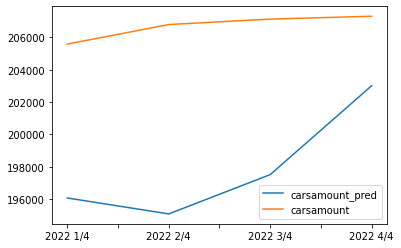

In [79]:
a = pd.DataFrame(y_pred)
a.index = y_test.index
a.columns = ['carsamount_pred']
result = pd.concat([a,y_test],axis=1)
result.plot()

# VAR

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler,Normalizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.decomposition import PCA

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

In [81]:
X = qq.iloc[:,1:]
y = qq.iloc[:,0]

In [82]:
#StandardScaler 객체 생성
scaler = StandardScaler()
#StandardScaler로 데이터 셋 변환, fit()과 transform()호출
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)
X_scaled.index = years1
X_scaled
X = X_scaled

In [83]:
df = pd.merge(y, X,left_index=True, right_index=True,how='inner')
df

,carsamount,population,oilprice,GDP,interest
2012 1/4,177985.000000,-1.262163,1.651084,-1.800034,1.986676
2012 2/4,177140.666667,-1.279909,1.776807,-1.562048,1.986676
2012 3/4,176569.000000,-1.298161,1.563049,-1.500236,1.666480
2012 4/4,176588.000000,-1.380838,1.533640,-1.264139,1.346283
2013 1/4,176097.666667,-1.379660,1.540282,-1.612264,1.346283
2013 2/4,175321.666667,-1.333654,1.320941,-1.304614,1.026086
2013 3/4,175074.000000,-1.287731,1.429384,-1.186660,1.026086
2013 4/4,175577.333333,-1.259556,1.154209,-0.968433,1.026086
2014 1/4,176294.333333,-0.914380,1.183233,-1.296568,1.026086
2014 2/4,177105.666667,-0.569121,1.139288,-1.035896,1.026086


In [84]:
import statsmodels.api as sm

vif = [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]

result = sm.OLS(y,X).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:             carsamount   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):             -0.096
Method:                 Least Squares   F-statistic:                            0.03402
Date:                Thu, 23 Mar 2023   Prob (F-statistic):                       0.998
Time:                        00:57:49   Log-Likelihood:                         -598.20
No. Observations:                  44   AIC:                                      1204.
Df Residuals:                      40   BIC:                                      1212.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [85]:
import statsmodels.api as sm
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,2.207231,population
1,4.107683,oilprice
2,1.536085,GDP
3,3.074956,interest


In [86]:
#컬럼별로 정상성확인하는 함수
for i in df.columns:
    adfuller_test = adfuller(df[i],autolag='AIC')
    print(i)
    print("ADF test statistic: {}".format(adfuller_test[0]))
    print("p-value: {}".format(adfuller_test[1]))

carsamount
ADF test statistic: -1.5523075983072074
p-value: 0.5074953180388609
population
ADF test statistic: -3.382435126310721
p-value: 0.011572431140013736
oilprice
ADF test statistic: -2.2701554704758657
p-value: 0.18177412632196283
GDP
ADF test statistic: -1.2226530858248714
p-value: 0.6637758114722918
interest
ADF test statistic: -2.536943546071389
p-value: 0.10674231128046408


In [87]:
df_ = df.drop(['carsamount','oilprice','interest','GDP'], axis=1).copy()

df_['carsamount'] = df['carsamount'].diff().bfill()
df_['oilprice']= df['oilprice'].diff().bfill()
df_['interest']= df['interest'].diff().bfill()
df_['GDP']= df['GDP'].diff().bfill()

In [88]:
for i in df.columns:
    adfuller_test = adfuller(df_[i],autolag='AIC')
    print(i)
    print("ADF test statistic: {}".format(adfuller_test[0]))
    print("p-value: {}".format(adfuller_test[1]))

carsamount
ADF test statistic: -2.265874474672335
p-value: 0.18321038691345298
population
ADF test statistic: -3.382435126310721
p-value: 0.011572431140013736
oilprice
ADF test statistic: -5.458656151874975
p-value: 2.5477530044175785e-06
GDP
ADF test statistic: -2.847829421493311
p-value: 0.051759781325235364
interest
ADF test statistic: -1.259466779572458
p-value: 0.6475064067112996


In [89]:
df_1 = df_.drop(['carsamount','interest','GDP'],axis=1).copy()

df_1['carsamount'] = df_['carsamount'].diff().bfill()
df_1['interest'] = df_['interest'].diff().bfill()
df_1['GDP'] = df_['GDP'].diff().bfill()
df_1 = df_1[['carsamount','oilprice','population','interest','GDP']]
df_1

,carsamount,oilprice,population,interest,GDP
2012 1/4,0.000000,0.125723,-1.262163,0.000000e+00,0.000000
2012 2/4,0.000000,0.125723,-1.279909,0.000000e+00,0.000000
2012 3/4,272.666667,-0.213758,-1.298161,-3.201969e-01,-0.176173
2012 4/4,590.666667,-0.029409,-1.380838,-2.220446e-16,0.174285
2013 1/4,-509.333333,0.006642,-1.379660,3.201969e-01,-0.584223
2013 2/4,-285.666667,-0.219341,-1.333654,-3.201969e-01,0.655776
2013 3/4,528.333333,0.108443,-1.287731,3.201969e-01,-0.189697
2013 4/4,751.000000,-0.275175,-1.259556,0.000000e+00,0.100274
2014 1/4,213.666667,0.029024,-0.914380,0.000000e+00,-0.546362
2014 2/4,94.333333,-0.043945,-0.569121,0.000000e+00,0.588807


In [90]:
for i in df.columns:
    adfuller_test = adfuller(df_1[i],autolag='AIC')
    print(i)
    print("ADF test statistic: {}".format(adfuller_test[0]))
    print("p-value: {}".format(adfuller_test[1]))

carsamount
ADF test statistic: -4.784315059291818
p-value: 5.8270596217993036e-05
population
ADF test statistic: -3.382435126310721
p-value: 0.011572431140013736
oilprice
ADF test statistic: -5.458656151874975
p-value: 2.5477530044175785e-06
GDP
ADF test statistic: -3.4701566708585605
p-value: 0.008787439614996683
interest
ADF test statistic: -8.04185621331679
p-value: 1.8379709641760386e-12


In [91]:
train = df_1.iloc[:-4,:]
test = df_1.iloc[-4:,:]

In [92]:
train100 = df.iloc[:-4,:]
test100 = df.iloc[-4:,:]

In [93]:
#VAR모델 선언 및 최적값을 찾기위해 AIC 확인
forecasting_model = VAR(train)
results_aic = []
for p in range(1,6):
  results = forecasting_model.fit(p)
  results_aic.append(results.aic)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


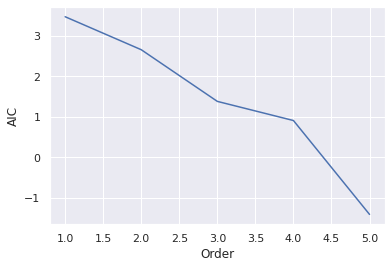

In [94]:
sns.set()
plt.plot(list(np.arange(1,6,1)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

In [95]:
#최적의 AIC값을 나타내는 순서 인덱스 추출
np.argsort(results_aic)[0]

4

In [96]:
results = forecasting_model.fit(np.argsort(results_aic)[0])
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 23, Mar, 2023
Time:                     00:57:49
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    5.52673
Nobs:                     36.0000    HQIC:                   2.52015
Log likelihood:          -166.755    FPE:                    5.75347
AIC:                     0.908132    Det(Omega_mle):        0.578187
--------------------------------------------------------------------
Results for equation carsamount
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                27.980639       166.409631            0.168           0.866
L1.carsamount        -0.141110         0.279486           -0.505           0.614
L1.oilprice         336.200485       467.458332        

In [97]:
#차분 값에 대한 다변량 시계열 분석 진행
laaged_values = train.values
forecast = pd.DataFrame(results.forecast(y= laaged_values, steps=4), index = test.index,\
                        columns=df.columns)
forecast

,carsamount,population,oilprice,GDP,interest
2022 1/4,-639.822559,0.001592,-0.920372,0.205898,-0.813256
2022 2/4,538.500373,0.591608,-0.838143,0.056585,1.019023
2022 3/4,1017.845892,0.238432,-0.705967,0.197496,-0.352016
2022 4/4,229.913111,-0.166652,-0.599941,-0.027310,0.070693


In [98]:
for i in df.columns:
    forecast[f'{i}_forecasted']= df[i].iloc[-4-1]+forecast[i].cumsum()
print(forecast)

           carsamount  population  oilprice       GDP  interest  \
2022 1/4  -639.822559    0.001592 -0.920372  0.205898 -0.813256   
2022 2/4   538.500373    0.591608 -0.838143  0.056585  1.019023   
2022 3/4  1017.845892    0.238432 -0.705967  0.197496 -0.352016   
2022 4/4   229.913111   -0.166652 -0.599941 -0.027310  0.070693   

          carsamount_forecasted  population_forecasted  oilprice_forecasted  \
2022 1/4          203930.844107              -0.876791            -0.697581   
2022 2/4          204469.344480              -0.285182            -1.535724   
2022 3/4          205487.190372              -0.046750            -2.241691   
2022 4/4          205717.103483              -0.213403            -2.841632   

          GDP_forecasted  interest_forecasted  
2022 1/4        1.884467            -1.708352  
2022 2/4        1.941052            -0.689329  
2022 3/4        2.138549            -1.041345  
2022 4/4        2.111239            -0.970652  


<Axes: >

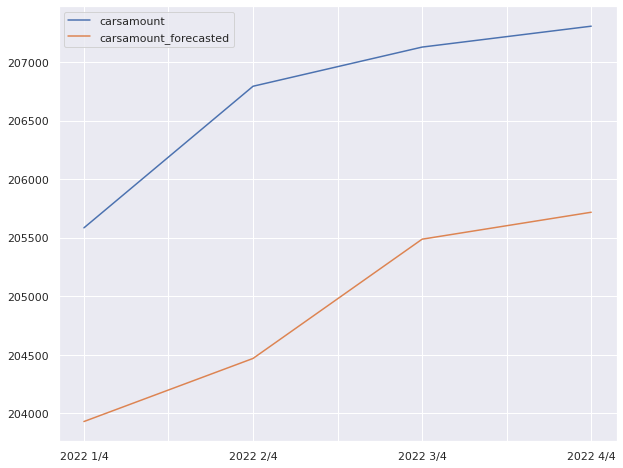

In [99]:
test = df.iloc[-4:,:1]
for i in test.columns:
    test[f'{i}_forecasted'] = forecast[f'{i}_forecasted']
test.plot(figsize=(10,8))

In [100]:
trainu = df_1

In [101]:
laaged_values = trainu.values[-4:]
forecast = pd.DataFrame(results.forecast(y= laaged_values, steps=4), index = ['2023 1/4','2023 2/4','2023 3/4','2023 4/4'], columns= df_1.columns)
forecast

,carsamount,oilprice,population,interest,GDP
2023 1/4,-993.595980,0.969543,-1.144276,0.067561,-0.557986
2023 2/4,2442.103255,-0.242197,-0.915495,-0.147443,0.521839
2023 3/4,1271.602212,0.465897,-0.634598,-0.216683,0.280289
2023 4/4,-726.433336,-0.731463,-0.389071,0.127832,-0.268037


In [102]:
for i in df.columns:
    forecast[f'{i}_forecasted']= df[i].iloc[-4-1]+forecast[i].cumsum()
print(forecast)

           carsamount  oilprice  population  interest       GDP  \
2023 1/4  -993.595980  0.969543   -1.144276  0.067561 -0.557986   
2023 2/4  2442.103255 -0.242197   -0.915495 -0.147443  0.521839   
2023 3/4  1271.602212  0.465897   -0.634598 -0.216683  0.280289   
2023 4/4  -726.433336 -0.731463   -0.389071  0.127832 -0.268037   

          carsamount_forecasted  population_forecasted  oilprice_forecasted  \
2023 1/4          203577.070687              -2.022659             1.192335   
2023 2/4          206019.173942              -2.938154             0.950137   
2023 3/4          207290.776154              -3.572752             1.416034   
2023 4/4          206564.342817              -3.961823             0.684571   

          GDP_forecasted  interest_forecasted  
2023 1/4        1.120583            -0.827535  
2023 2/4        1.642422            -0.974977  
2023 3/4        1.922710            -1.191661  
2023 4/4        1.654673            -1.063828  


# ARIMA

In [103]:
import pandas as pd
from datetime import datetime, timedelta


start_date= pd.to_datetime('201203', format='%Y%m')

end_date=pd.to_datetime('202303', format='%Y%m')

date_list=pd.date_range(start=start_date, end=end_date, freq='Q')
print(date_list)

DatetimeIndex(['2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31', '2013-06-30', '2013-09-30', '2013-12-31',
               '2014-03-31', '2014-06-30', '2014-09-30', '2014-12-31',
               '2015-03-31', '2015-06-30', '2015-09-30', '2015-12-31',
               '2016-03-31', '2016-06-30', '2016-09-30', '2016-12-31',
               '2017-03-31', '2017-06-30', '2017-09-30', '2017-12-31',
               '2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31',
               '2019-03-31', '2019-06-30', '2019-09-30', '2019-12-31',
               '2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31',
               '2021-03-31', '2021-06-30', '2021-09-30', '2021-12-31',
               '2022-03-31', '2022-06-30', '2022-09-30', '2022-12-31'],
              dtype='datetime64[ns]', freq='Q-DEC')


In [104]:
ts = q[['carsamount']]
ts.index = date_list
ts

,carsamount
2012-03-31,177985.000000
2012-06-30,177140.666667
2012-09-30,176569.000000
2012-12-31,176588.000000
2013-03-31,176097.666667
2013-06-30,175321.666667
2013-09-30,175074.000000
2013-12-31,175577.333333
2014-03-31,176294.333333
2014-06-30,177105.666667


<Figure size 432x288 with 0 Axes>

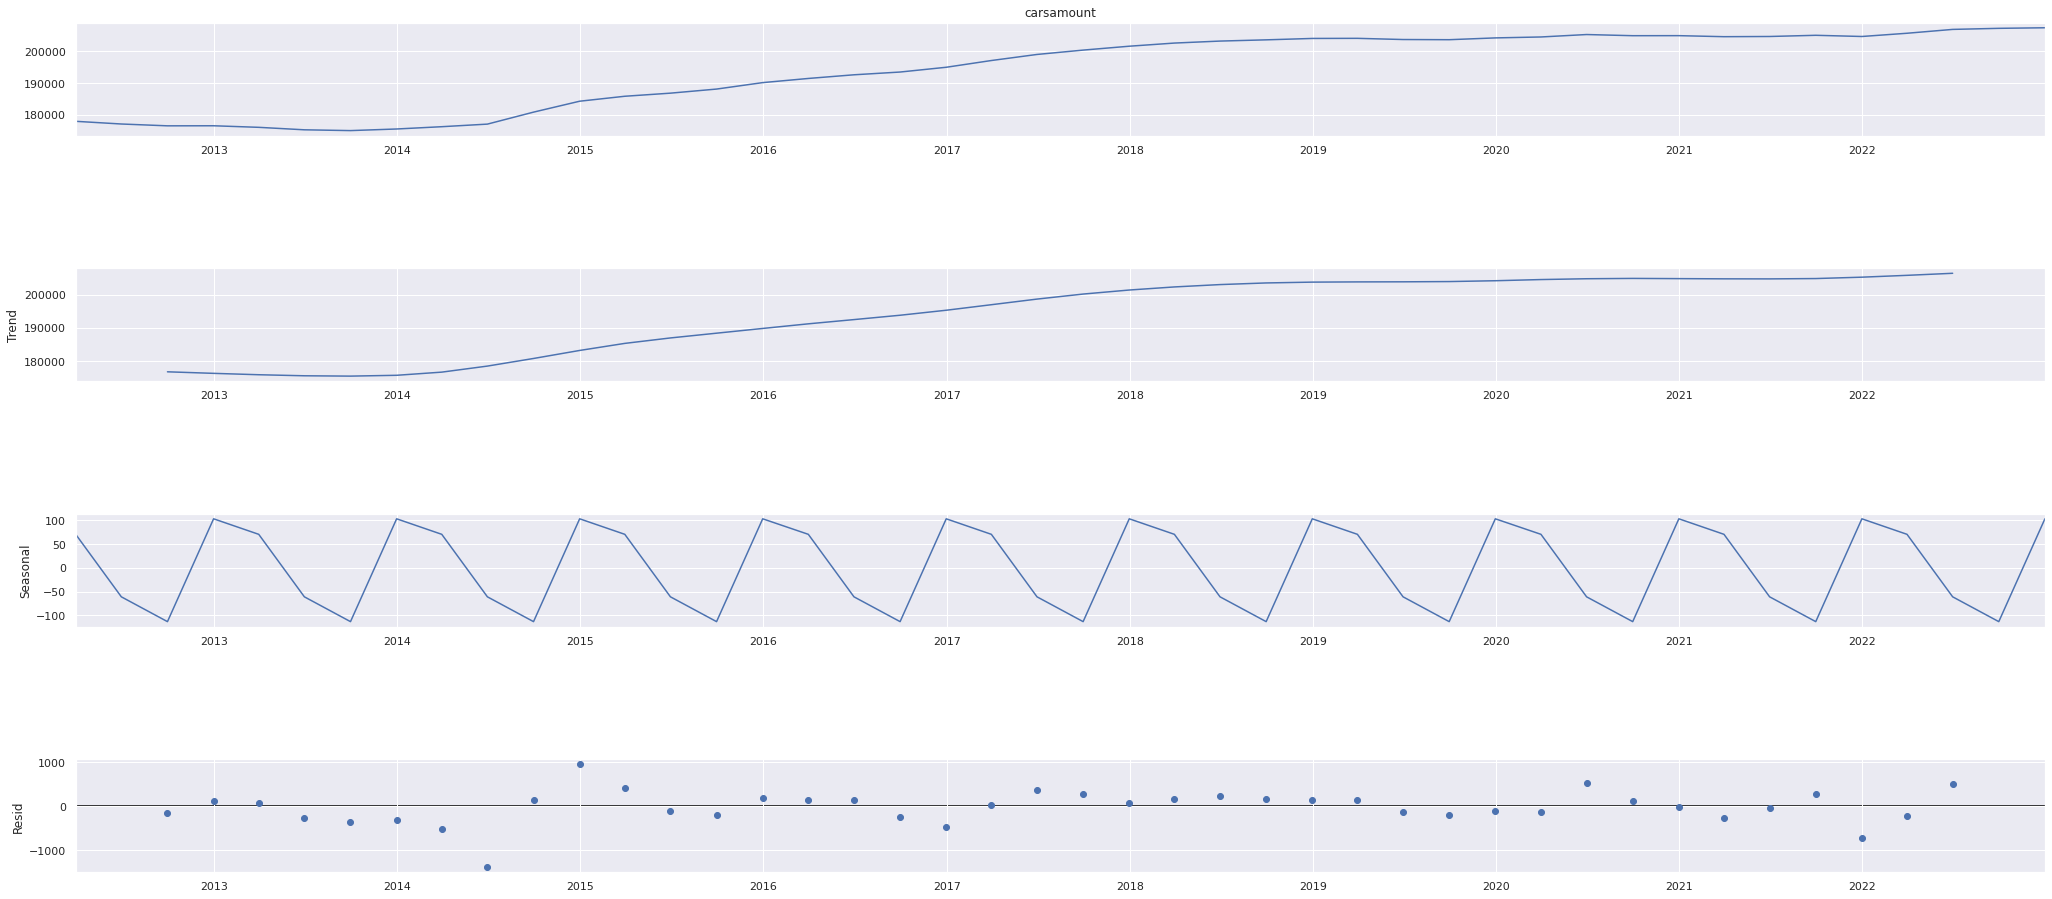

In [105]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts['carsamount'], model='additive', period=4)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(35,15)

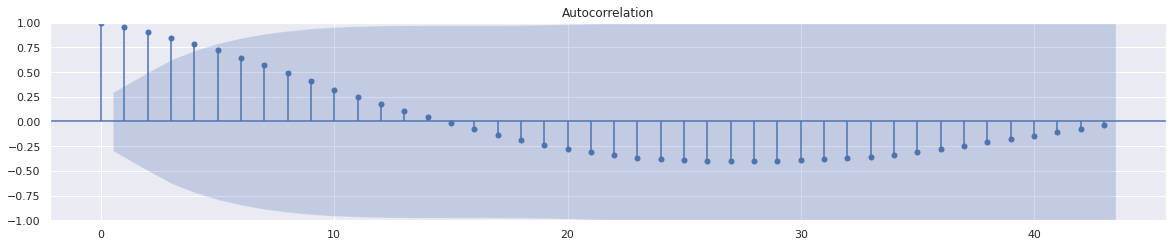

In [106]:
import statsmodels.api as sm

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts, lags=43, ax=ax1)

In [107]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts)
print('ADF stat: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical values:')
for key, value in result[4].items():
  print('\t%s: %.3f' %(key,value))

ADF stat: -1.552308
p-value: 0.507495
Critical values:
	1%: -3.601
	5%: -2.935
	10%: -2.606


In [108]:
#정상성을 만족하지 못함

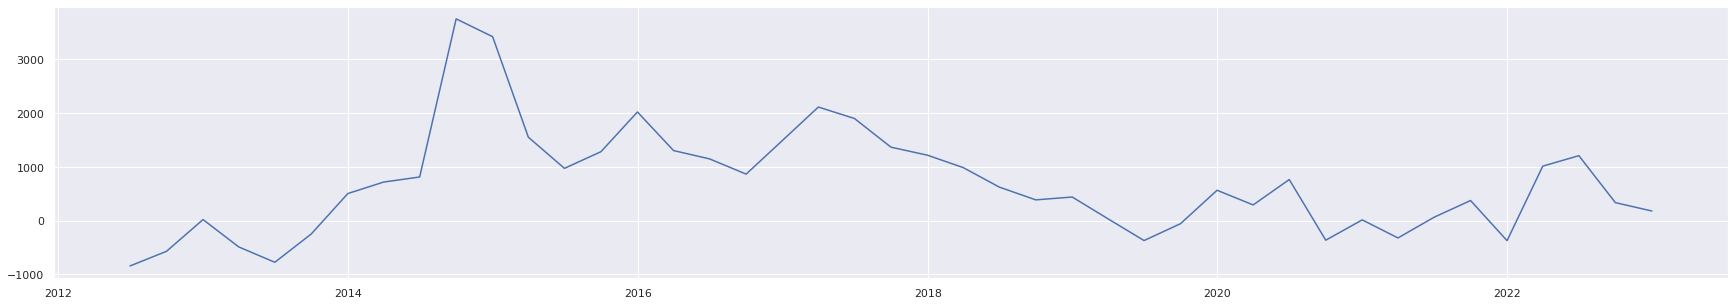

In [109]:
ts_diff = ts-ts.shift()
plt.figure(figsize=(30,5))
plt.plot(ts_diff)


In [110]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts_diff[1:])
print('ADF stat: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical values:')
for key, value in result[4].items():
  print('\t%s: %.3f' %(key,value))

ADF stat: -2.150955
p-value: 0.224525
Critical values:
	1%: -3.610
	5%: -2.939
	10%: -2.608


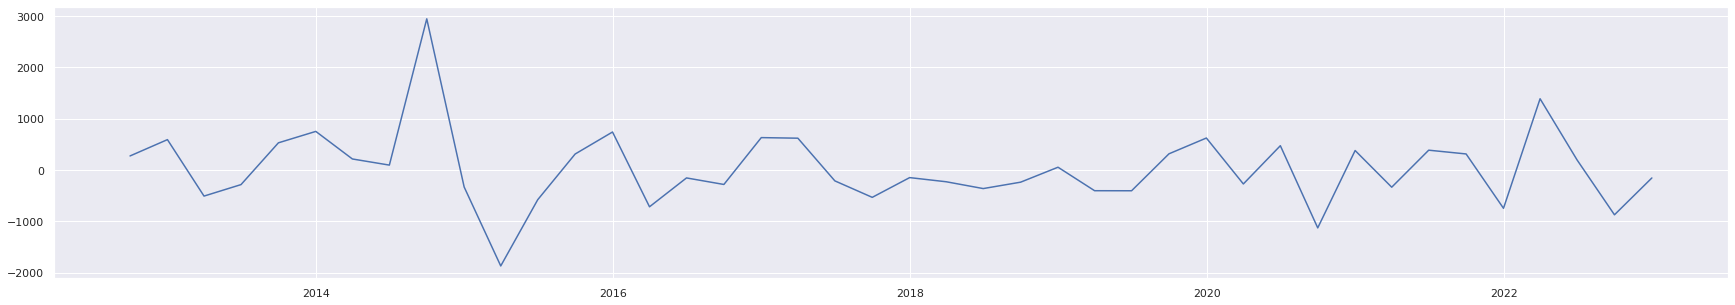

In [111]:
ts_diff1 = ts_diff-ts_diff.shift()
plt.figure(figsize=(30,5))
plt.plot(ts_diff1)

In [112]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts_diff1[2:])
print('ADF stat: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical values:')
for key, value in result[4].items():
  print('\t%s: %.3f' %(key,value))

ADF stat: -4.642810
p-value: 0.000108
Critical values:
	1%: -3.610
	5%: -2.939
	10%: -2.608


In [113]:
#2차 차분 정상성 만족

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


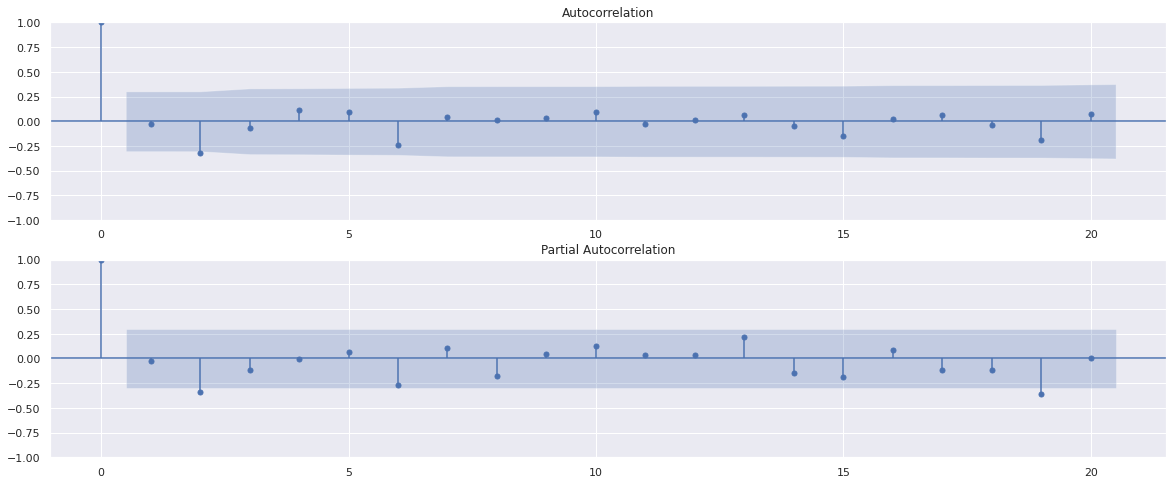

In [114]:
import statsmodels.api as sm

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_diff1[2:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_diff1[2:],lags=20,ax=ax2)

In [115]:
#ARIMA(0,2,0)

In [116]:
import statsmodels.api as sm

model = sm.tsa.arima.ARIMA(ts, order=(0,2,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             carsamount   No. Observations:                   44
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -337.177
Date:                Thu, 23 Mar 2023   AIC                            676.354
Time:                        00:57:55   BIC                            678.091
Sample:                    03-31-2012   HQIC                           676.990
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.493e+05   6.63e+04      8.289      0.000    4.19e+05    6.79e+05
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                41.85
Prob(Q):                              0.85   Pr

In [117]:
start_index = datetime(2022,3,31)
end_index = datetime(2022,12,31)
forecast = model_fit.predict(start=start_index, end=end_index, tpy='levels')

In [118]:
forecast

2022-03-31    204197.000000
2022-06-30    206597.333333
2022-09-30    208000.666667
2022-12-31    207461.000000
Freq: Q-DEC, Name: predicted_mean, dtype: float64

In [119]:
fore = model_fit.forecast(steps=4)
print(fore)

2023-03-31    207483.333333
2023-06-30    207661.666667
2023-09-30    207840.000000
2023-12-31    208018.333333
Freq: Q-DEC, Name: predicted_mean, dtype: float64


<Axes: >

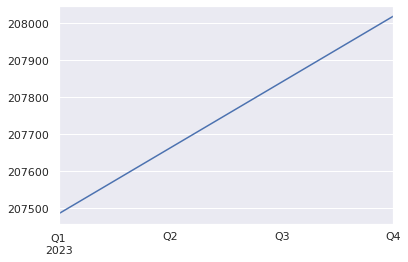

In [120]:
fore.plot()

In [121]:
q1 = q
q1.index = ts.index
q3 = q1[['population', 'income', 'oilprice', 'GDP','interest']]

In [122]:
q2 = q1[['population', 'income', 'oilprice', 'GDP','interest']].tail(4)

In [123]:
exog_array = q2.values.reshape(-1, q2.shape[1])

In [124]:
model1 = sm.tsa.arima.ARIMA(q1['carsamount'], order=(0, 2, 0), exog = q3)

In [125]:
results = model1.fit()

In [126]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:             carsamount   No. Observations:                   44
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -393.116
Date:                Thu, 23 Mar 2023   AIC                            798.233
Time:                        00:57:56   BIC                            808.659
Sample:                    03-31-2012   HQIC                           802.054
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
population     0.0879      4.038      0.022      0.983      -7.826       8.002
income         1.2004     55.451      0.022      0.983    -107.481     109.882
oilprice      -0.4843     59.853     -0.008      0.9

In [127]:
a = results.predict(start=start_index, end=end_index, tpy='levels')
a

2022-03-31    204538.802629
2022-06-30    206199.268057
2022-09-30    207667.427288
2022-12-31    207614.205714
Freq: Q-DEC, Name: predicted_mean, dtype: float64

In [128]:
forecast1 = results.forecast(steps=4, exog=q3.tail(4))

In [129]:
print(forecast1)

2023-03-31    209389.898475
2023-06-30    209748.265473
2023-09-30    209773.393092
2023-12-31    209951.726425
Freq: Q-DEC, Name: predicted_mean, dtype: float64


<Axes: >

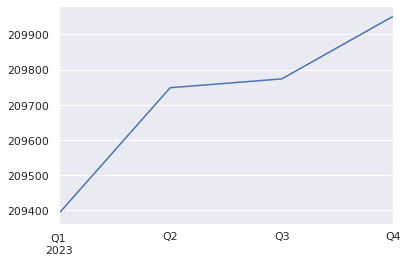

In [130]:
forecast1.plot()

In [131]:
#현재 주어진 데이터를 사용해 강서구의 차량등록수가 2023년 4분기까지 대략 209000대가 생길 것이라고 유추 해볼 수 있다.


# 재미삼아 해보는 SVR

In [132]:
q

,carsamount,oilprice,population,income,interest,GDP
2012-03-31,177985.000000,2063.06,575205,3159.0,3.25,344574.6
2012-06-30,177140.666667,2089.18,574994,3159.0,3.25,358275.7
2012-09-30,176569.000000,2044.77,574777,3159.0,3.00,361834.3
2012-12-31,176588.000000,2038.66,573794,3159.0,2.75,375426.7
2013-03-31,176097.666667,2040.04,573808,3391.0,2.75,355384.7
2013-06-30,175321.666667,1994.47,574355,3391.0,2.50,373096.5
2013-09-30,175074.000000,2017.00,574901,3391.0,2.50,379887.2
2013-12-31,175577.333333,1959.83,575236,3391.0,2.50,392450.8
2014-03-31,176294.333333,1965.86,579340,3507.0,2.50,373559.7
2014-06-30,177105.666667,1956.73,583445,3507.0,2.50,388566.9


In [133]:
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

x, y = q.drop('carsamount',axis=1), q['carsamount']

# StandardScale
scaler = StandardScaler() 
scaler.fit(x) 
x = scaler.transform(x)
x = pd.DataFrame(x)


scaler.fit((np.array(y)).reshape(-1,1))
y = scaler.transform((np.array(y)).reshape(-1,1))
y = pd.DataFrame(y)

xtrain = x.iloc[0:40]
xtest = x.iloc[40:44]
ytrain = y.iloc[0:40]
ytest = y.iloc[40:44]

svr = SVR(kernel='rbf', gamma='auto')
svr.fit(xtrain, ytrain.values.ravel())

SVR(gamma='auto')

R-squared:  0.9934514665556015
CV mean score:  -43.12150351562692
MSE:  0.7770125783692954


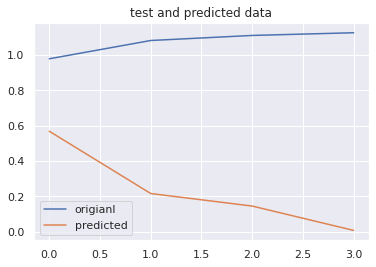

In [139]:
score = svr.score(xtrain, ytrain.values.ravel())
print("R-squared: ", score)

cv_score = cross_val_score(svr, x, y.values.ravel(), cv=10)
print("CV mean score: ", cv_score.mean())

ypred = svr.predict(xtest)

mse = mean_squared_error(ytest.values.ravel(), ypred)
print("MSE: ", mse)

x_ax = range(len(ytest.values.ravel()))
plt.plot(x_ax, ytest.values.ravel(), label='origianl')
plt.plot(x_ax, ypred, label="predicted")
plt.title("test and predicted data")
plt.legend()
plt.show()

# 단순 linear Regression

<Axes: >

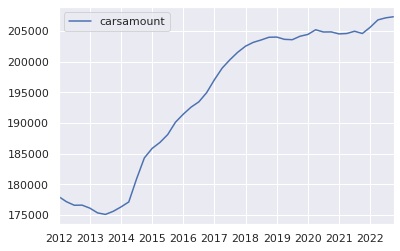

In [143]:
q_car = q[['carsamount']]
q_car.plot()

In [158]:
q_car

,carsamount,time
2012-03-31,177985.000000,1
2012-06-30,177140.666667,2
2012-09-30,176569.000000,3
2012-12-31,176588.000000,4
2013-03-31,176097.666667,5
2013-06-30,175321.666667,6
2013-09-30,175074.000000,7
2013-12-31,175577.333333,8
2014-03-31,176294.333333,9
2014-06-30,177105.666667,10


In [144]:
q_car['time'] = range(1,len(q_car)+1) 
y = q_car['carsamount']
X = q_car['time']
X = sm.add_constant(X)

<ipython-input-144-b5cd12124ede>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_car['time'] = range(1,len(q_car)+1)


In [147]:
time = q_car['time']
mean_t = time.mean()
mean_y = y.mean()
b1 = np.sum((y-mean_y)*(time-mean_t))/np.sum(np.square(time-mean_t))
b0 = mean_y-b1*mean_t
print(b1)
print(b0)

868.061874559549
174626.89570119802


In [156]:
from scipy.stats.distributions import t

In [167]:
future = [1,2,3]
n = len(q_car)
alpha = 0.05
X_tX_inv = np.linalg.inv(X.T.dot(X))
t_val = t.ppf(1-alpha/2,df=n-2)
 
predict_vals = []
upper_limit = []
lower_limit = []
for l in future:
    predict_val = b0+b1*(n+l)
    s2 = np.sum(np.square(y-b0-b1*time))/(n-2)
    x = np.array([[1],[n+l]])
    variance_factor = np.sqrt(1+x.T.dot(X_tX_inv.dot(x)))
    limit = t_val*np.sqrt(s2)*variance_factor[0][0]
    predict_vals.append(predict_val)
    upper_limit.append(predict_val+limit)
    lower_limit.append(predict_val-limit)

In [168]:
start_date = '2022-12-31'
 
pred_data = {
    'pred':predict_vals,
    'ul':upper_limit,
    'll':lower_limit
}
pred_df = pd.DataFrame(pred_data)
pred_df.index = pd.date_range(start_date,periods=future[-1],freq='Y')
 
fitted_val = b0+b1*time
vals = pd.concat([fitted_val,pred_df['pred']])

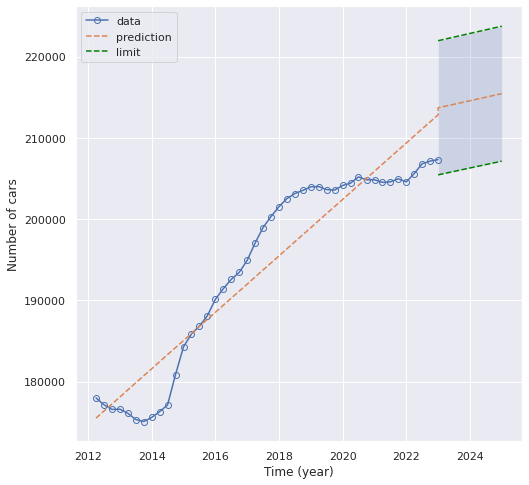

In [169]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
 
marker_config = dict()
marker_config['marker'] = 'o'
marker_config['markerfacecolor'] = 'none'
plt.plot(q_car['carsamount'],label='data',**marker_config)
plt.plot(vals,label='prediction',linestyle='--')
 
plt.plot(pred_df['ll'],color='green',linestyle='--',label='limit')
plt.plot(pred_df['ul'],color='green',linestyle='--')
plt.fill_between(pred_df.index,pred_df['ll'],pred_df['ul'],alpha=0.2)
plt.legend(loc='upper left')
plt.ylabel('Number of cars')
plt.xlabel('Time (year)')
plt.show()